In [1]:
import numpy as np
import pandas as pd

In [3]:
import os

In [6]:
os.chdir("E:\[Portfolio Project]\Digit Recognizor")

In [7]:
%pwd

'E:\\[Portfolio Project]\\Digit Recognizor'

In [9]:
df = pd.read_csv("artifacts/data_ingestion/data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x = df.drop("label", axis=1)
y = df["label"]

In [53]:
x.shape

(42000, 784)

In [44]:
x=x/255.0


In [ ]:
x_images = x.values.reshape(-1, 28, 28, 1)
a = x_images[10]

In [54]:
x_images.shape

(42000, 28, 28, 1)

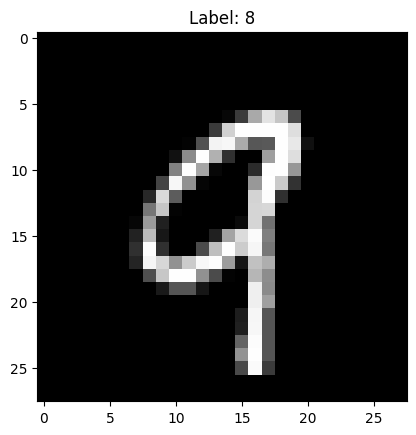

In [57]:
import matplotlib.pyplot as plt

plt.imshow(x_images[41999].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y.iloc[10]}")
plt.show()


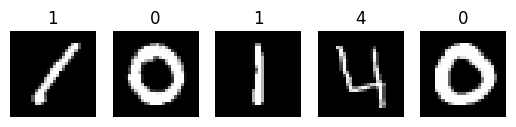

In [58]:
import matplotlib.pyplot as plt

# Display the first 5 images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_images[i].reshape(28, 28), cmap='gray')
    plt.title(y[i])  # Assuming y contains labels
    plt.axis('off')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_images, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


e:\[Portfolio Project]\Digit Recognizor\digit\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.8754 - loss: 0.3989 - val_accuracy: 0.9776 - val_loss: 0.0703
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.9832 - loss: 0.0543 - val_accuracy: 0.9854 - val_loss: 0.0458
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9852 - val_loss: 0.0450
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.9915 - loss: 0.0244 - val_accuracy: 0.9864 - val_loss: 0.0451
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9931 - loss: 0.0190 - val_accuracy: 0.9870 - val_loss: 0.0404
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9889 - val_loss: 0.0363
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9882 - val_loss: 0.0383
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9979 -

In [64]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation Accuracy: {val_accuracy:.2f}")


263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9912 - loss: 0.0418
Validation Accuracy: 0.99


In [89]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

img_path = "num.jpg"





In [90]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [91]:
img_resized = cv2.resize(img, (28, 28))

In [92]:
img_normalized = img_resized / 255.0

In [93]:
img_reshaped = img_normalized.reshape(-1, 28, 28, 1)

In [94]:
prediction = model.predict(img_reshaped)
predicted_label = np.argmax(prediction)

print(f"Predicted Digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Digit: 2


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("E:\[Portfolio Project]\Digit Recognizor")

data_set = pd.read_csv("artifacts/data_transformation/training/x_train.csv")

In [24]:
lable = pd.read_csv("artifacts/data_transformation/training/y_train.csv")

In [25]:
data_set.head(1)
data_set.shape

(33600, 784)

In [26]:
data = data_set.values.reshape(-1, 28, 28, 1)

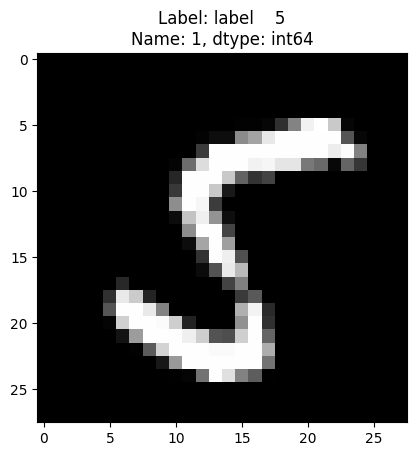

In [27]:
plt.title(f"Label: {lable.iloc[1]}")
plt.imshow(data[1].reshape(28, 28), cmap='gray')

In [42]:
test_d = pd.read_csv(r"artifacts\data_transformation\validation\x_val.csv")
test_l = pd.read_csv(r"artifacts\data_transformation\validation\y_val.csv")

test_d = test_d.values.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize pixel values
test_l = test_l.values.flatten()

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

class PredictionPipeline:
    def __init__(self,filename):
        self.filename =filename



    def predict(self):
        # Load the trained model
        model = load_model(r'artifacts\training\model.h5')

        # Load the image
        img = cv2.imread(self.filename, cv2.IMREAD_GRAYSCALE)

        # Resize the image
        img_resized = cv2.resize(img, (28, 28))

        # Normalize the image
        img_normalized = img_resized.astype('float32') / 255.0

        # Reshape the image for the model
        img_reshaped = img_normalized.reshape((1, 28, 28, 1))

        # Make a prediction
        prediction = model.predict(img_reshaped)

        # Return the predicted digit
        return np.argmax(prediction)
    
    # Example usage
filename = r'research\notebook\num.jpg'
pipeline = PredictionPipeline(filename)
predicted_digit = pipeline.predict()
print(f"Predicted Digit: {predicted_digit}")

# import tkinter as tk
# from tkinter import messagebox
# import numpy as np
# import cv2
# from PIL import Image, ImageGrab
# from tensorflow.keras.models import load_model

# class DigitRecognizerApp:
#     def __init__(self, root, model_path):
#         self.root = root
#         self.root.title("Digit Recognizer")
#         self.root.geometry("400x500")

#         # Load the trained model
#         self.model = load_model(model_path)

#         # Create canvas for drawing
#         self.canvas = tk.Canvas(self.root, width=280, height=280, bg="white", cursor="cross")
#         self.canvas.pack(pady=20)

#         # Buttons for actions
#         self.clear_button = tk.Button(self.root, text="Clear", command=self.clear_canvas, bg="red", fg="white")
#         self.clear_button.pack(side=tk.LEFT, padx=10)

#         self.predict_button = tk.Button(self.root, text="Predict", command=self.predict_digit, bg="green", fg="white")
#         self.predict_button.pack(side=tk.RIGHT, padx=10)

#         # Bind mouse events for drawing
#         self.canvas.bind("<B1-Motion>", self.paint)

#     def paint(self, event):
#         x, y = event.x, event.y
#         self.canvas.create_oval((x - 8, y - 8, x + 8, y + 8), fill="black", outline="black")

#     def clear_canvas(self):
#         self.canvas.delete("all")

#     def predict_digit(self):
#         # Save the canvas content as an image
#         x = self.root.winfo_rootx() + self.canvas.winfo_x()
#         y = self.root.winfo_rooty() + self.canvas.winfo_y()
#         x1 = x + self.canvas.winfo_width()
#         y1 = y + self.canvas.winfo_height()

#         # Capture canvas and preprocess
#         img = ImageGrab.grab(bbox=(x, y, x1, y1)).convert("L")  # Convert to grayscale
#         img = img.resize((28, 28))  # Resize to 28x28
#         img = np.array(img)
#         img = img.astype('float32') / 255.0  # Normalize
#         img = img.reshape(1, 28, 28, 1)  # Reshape for model

#         # Predict
#         prediction = self.model.predict(img)
#         digit = np.argmax(prediction)

#         # Display the prediction
#         messagebox.showinfo("Prediction", f"Predicted Digit: {digit}")

# # Run the app
# if __name__ == "__main__":
#     root = tk.Tk()
#     app = DigitRecognizerApp(root, model_path="artifacts/training/model.h5")
#     root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predicted Digit: 1
